<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Latihan%20Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

import zipfile,os
local_zip = '/content/drive/My Drive/Datasets Submisions/Submission 2/1201_2166_compressed_Luna Geocentric Clean.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import pandas as pd


df = pd.read_csv("Luna Geocentric Clean.csv")
df

,Date,Distance (AUs),Declination,Brightness,% Illuminated,Constellation
0,1800-Mar-20,0.002574,-25.57026,5.71,28.482,Sgr
1,1800-Mar-21,0.002594,-22.37387,5.96,19.418,Cap
2,1800-Mar-22,0.002612,-18.13501,6.20,11.844,Cap
3,1800-Mar-23,0.002628,-13.04402,6.36,6.022,Aqr
4,1800-Mar-24,0.002643,-7.27370,6.26,2.124,Aqr
...,...,...,...,...,...,...
80636,2020-Dec-27,0.002656,18.00002,4.15,90.903,Tau
80637,2020-Dec-28,0.002642,21.08397,3.91,95.715,Tau
80638,2020-Dec-29,0.002626,23.19300,3.65,98.811,Tau
80639,2020-Dec-30,0.002609,24.20497,3.38,99.983,Gem


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Distance (AUs),Declination,Brightness,% Illuminated,Constellation
0,1800-03-20,0.002574,-25.57026,5.71,28.482,Sgr
1,1800-03-21,0.002594,-22.37387,5.96,19.418,Cap
2,1800-03-22,0.002612,-18.13501,6.20,11.844,Cap
3,1800-03-23,0.002628,-13.04402,6.36,6.022,Aqr
4,1800-03-24,0.002643,-7.27370,6.26,2.124,Aqr
...,...,...,...,...,...,...
80636,2020-12-27,0.002656,18.00002,4.15,90.903,Tau
80637,2020-12-28,0.002642,21.08397,3.91,95.715,Tau
80638,2020-12-29,0.002626,23.19300,3.65,98.811,Tau
80639,2020-12-30,0.002609,24.20497,3.38,99.983,Gem


In [ ]:
df.describe()

,Distance (AUs),Declination,Brightness,% Illuminated
count,80641.000000,80641.000000,80641.000000,80641.000000
mean,0.002574,-0.587233,5.096706,49.965604
std,0.000104,16.624808,0.894193,35.125153
min,0.002359,-29.393020,-1.810000,0.000000
25%,0.002483,-16.295060,4.370000,15.019000
50%,0.002579,-0.381280,5.140000,49.924000
75%,0.002669,15.175630,5.900000,84.910000
max,0.002751,28.315850,6.420000,100.000000


In [ ]:
df = df[['Date','Declination']]
df

,Date,Declination
0,1800-03-20,-25.57026
1,1800-03-21,-22.37387
2,1800-03-22,-18.13501
3,1800-03-23,-13.04402
4,1800-03-24,-7.27370
...,...,...
80636,2020-12-27,18.00002
80637,2020-12-28,21.08397
80638,2020-12-29,23.19300
80639,2020-12-30,24.20497


In [ ]:
min = df['Declination'].min()
max = df['Declination'].max()
syarat = (max - min)*(10/100)
print(syarat)

5.770887000000001


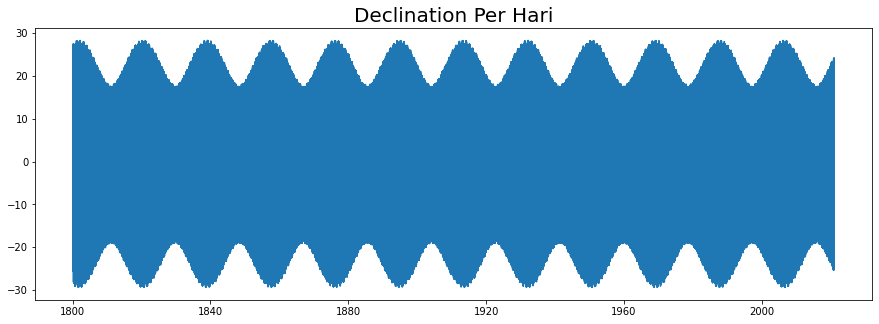

In [ ]:
    import matplotlib.pyplot as plt


    dates = df['Date'].values
    jarak  = df['Declination'].values

    plt.figure(figsize=(15,5))
    plt.plot(dates, jarak)
    plt.title('Declination Per Hari',
              fontsize=20);

In [ ]:
df.isnull().sum()

Date           0
Declination    0
dtype: int64

In [ ]:
n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*1.0)]


In [ ]:

train_df

,Date,Declination
0,1800-03-20,-25.57026
1,1800-03-21,-22.37387
2,1800-03-22,-18.13501
3,1800-03-23,-13.04402
4,1800-03-24,-7.27370
...,...,...
64507,1976-10-30,-13.55270
64508,1976-10-31,-10.26385
64509,1976-11-01,-6.35568
64510,1976-11-02,-2.34328


In [ ]:
val_df

,Date,Declination
64512,1976-11-04,5.22171
64513,1976-11-05,9.00295
64514,1976-11-06,12.14162
64515,1976-11-07,14.55436
64516,1976-11-08,16.57330
...,...,...
80636,2020-12-27,18.00002
80637,2020-12-28,21.08397
80638,2020-12-29,23.19300
80639,2020-12-30,24.20497


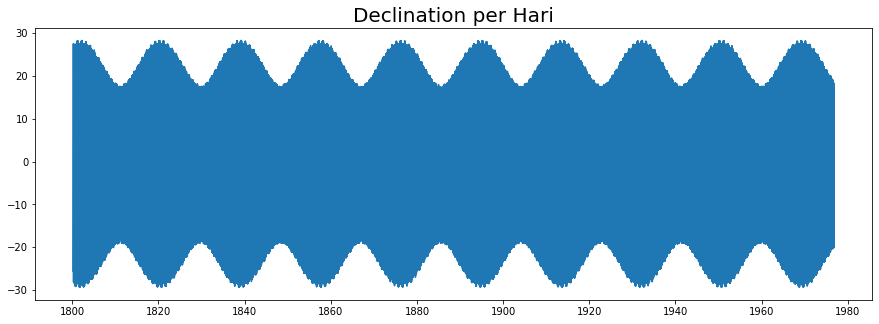

In [ ]:
import matplotlib.pyplot as plt

dates_train = train_df['Date'].values
jarak_train  = train_df['Declination'].values

plt.figure(figsize=(15,5))
plt.plot(dates_train, jarak_train)
plt.title('Declination per Hari',
          fontsize=20);

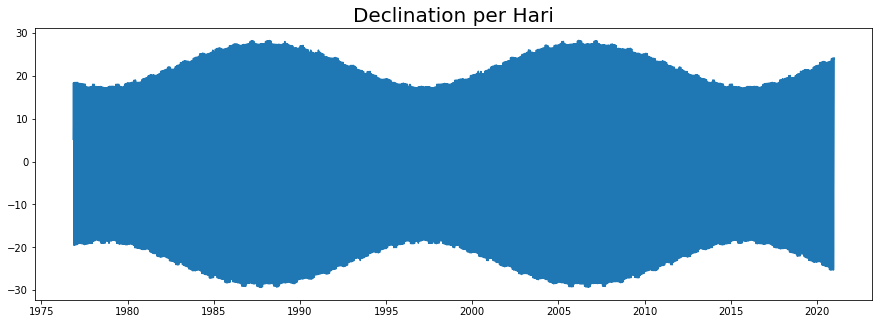

In [ ]:
import matplotlib.pyplot as plt

dates_val = val_df['Date'].values
jarak_val  = val_df['Declination'].values

plt.figure(figsize=(15,5))
plt.plot(dates_val, jarak_val)
plt.title('Declination per Hari',
          fontsize=20);

In [ ]:

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
from keras.layers import Dense, LSTM
import tensorflow as tf

train_set = windowed_dataset(jarak_train, window_size=80, batch_size=10, shuffle_buffer=1000)
val_set = windowed_dataset(jarak_val, window_size=80, batch_size=10, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [ ]:
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<(syarat * 0.6)):
          print(" MAE telah kurang dari 10%")
          self.model.stop_training = True
    callbacks = myCallback()

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.00001, momentum=0.1)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=25,validation_data=(val_set), steps_per_epoch=200, callbacks=[callbacks])

Epoch 1/25
200/200 [==============================] - 31s 155ms/step - loss: 2.2671 - mae: 2.7209 - val_loss: 2.2904 - val_mae: 2.7382
